## Import Required Libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from nltk.util import ngrams

In [2]:
data = pd.read_csv(r"C:\Users\kavya\Downloads\cleaned_data.csv")

In [3]:
data

,Categories,Resume_Details
0,0,anubhav kumar singh core competency scripting ...
1,0,ananda rayudu profile summary year experience ...
2,0,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,3,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant professional ...


## Dataset Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Categories      79 non-null     int64 
 1   Resume_Details  79 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


## Count of Resumes in Each Category

In [5]:
data['Categories'].value_counts()

Categories
1    24
3    21
0    20
2    14
Name: count, dtype: int64

## Visualization of Resume Category Counts

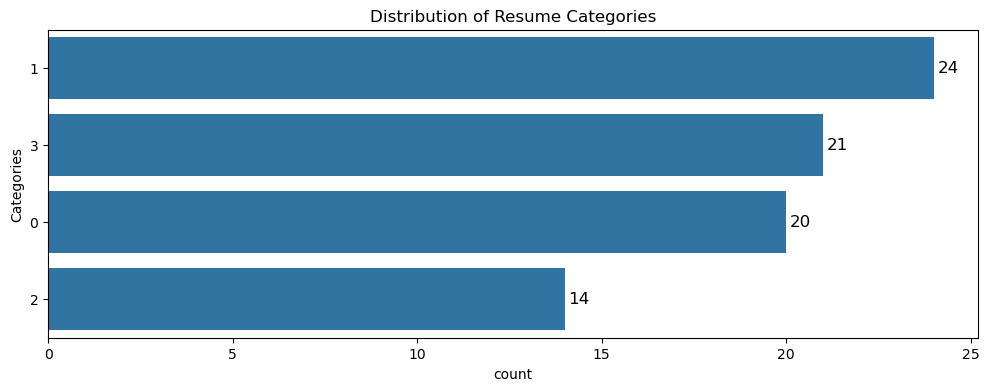

In [6]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(y=data['Categories'], order=data['Categories'].value_counts().index)

# Add count labels after the bars
for p in ax.patches:
    ax.text(p.get_width()+0.1,  # Position slightly after the bar
            p.get_y() + p.get_height()/2,  # Align vertically at center
            int(p.get_width()),  # Convert count to integer
            ha='left', va='center', fontsize=12)  # Align text

plt.title("Distribution of Resume Categories")
plt.show()

## Removing Emojis

In [7]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [8]:
data['Clean_Resumes'] = data['Resume_Details'].apply(lambda x: remove_emoji(x))
data

,Categories,Resume_Details,Clean_Resumes
0,0,anubhav kumar singh core competency scripting ...,anubhav kumar singh core competency scripting ...
1,0,ananda rayudu profile summary year experience ...,ananda rayudu profile summary year experience ...
2,0,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,3,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar role workday consul...,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant professional ...,venkateswarlu workday consultant professional ...


In [9]:
data = data.drop(columns=['Resume_Details'])
data

,Categories,Clean_Resumes
0,0,anubhav kumar singh core competency scripting ...
1,0,ananda rayudu profile summary year experience ...
2,0,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,3,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant professional ...


## Remove Image References from Text

In [10]:
def remove_image_references(text):
    # Remove image file extensions (e.g., .jpg, .png, .jpeg, etc.)
    text = re.sub(r'\S+\.(jpg|jpeg|png|gif|bmp|svg)', '', text, flags=re.IGNORECASE)

    # Remove possible embedded base64 images
    text = re.sub(r'data:image/[^;]+;base64,[^\s]+', '', text)

    return text.strip()

data['Cleaned_Resumes'] = data['Clean_Resumes'].astype(str).apply(remove_image_references)

In [11]:
data

,Categories,Clean_Resumes,Cleaned_Resumes
0,0,anubhav kumar singh core competency scripting ...,anubhav kumar singh core competency scripting ...
1,0,ananda rayudu profile summary year experience ...,ananda rayudu profile summary year experience ...
2,0,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,3,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar role workday consul...,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant professional ...,venkateswarlu workday consultant professional ...


In [12]:
data = data.drop(columns = ['Clean_Resumes'])

In [13]:
data

,Categories,Cleaned_Resumes
0,0,anubhav kumar singh core competency scripting ...
1,0,ananda rayudu profile summary year experience ...
2,0,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,3,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant professional ...


## Applying Lemmatization for Text Preprocessing

In [14]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def lemmatize_text(text):
    words = word_tokenize(str(text))  # Tokenize the text
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Apply lemmatization
    return " ".join(lemmatized_words)

In [15]:
# Apply lemmatization to the 'Cleaned_Resumes' column
data['Resume_Details'] = data['Cleaned_Resumes'].apply(lemmatize_text)

In [16]:
data

,Categories,Cleaned_Resumes,Resume_Details
0,0,anubhav kumar singh core competency scripting ...,anubhav kumar singh core competency scripting ...
1,0,ananda rayudu profile summary year experience ...,ananda rayudu profile summary year experience ...
2,0,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,3,workday integration consultant name sri krishn...,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar role workday consul...,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant professional ...,venkateswarlu workday consultant professional ...


In [17]:
data = data.drop(columns = ['Cleaned_Resumes'])

In [18]:
data

,Categories,Resume_Details
0,0,anubhav kumar singh core competency scripting ...
1,0,ananda rayudu profile summary year experience ...
2,0,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,3,workday integration consultant name sri krishn...
75,3,srikanth workday hcm consultant seeking suitab...
76,3,workday hcm fcm name kumar role workday consul...
77,3,venkateswarlu workday consultant professional ...


## Reorder columns

In [19]:
data = data[['Resume_Details', 'Categories']]  # Reorder columns
data.to_csv('Cleaned_Resumes.csv', index=False)  # Save to CSV without the index

In [20]:
df = pd.read_csv('cleaned_Resumes.csv')
df

,Resume_Details,Categories
0,anubhav kumar singh core competency scripting ...,0
1,ananda rayudu profile summary year experience ...,0
2,peoplesoft database administrator gangareddy p...,0
3,classification internal classification interna...,0
4,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...
74,workday integration consultant name sri krishn...,3
75,srikanth workday hcm consultant seeking suitab...,3
76,workday hcm fcm name kumar role workday consul...,3
77,venkateswarlu workday consultant professional ...,3


## Analysis of Resume Word Count Distribution

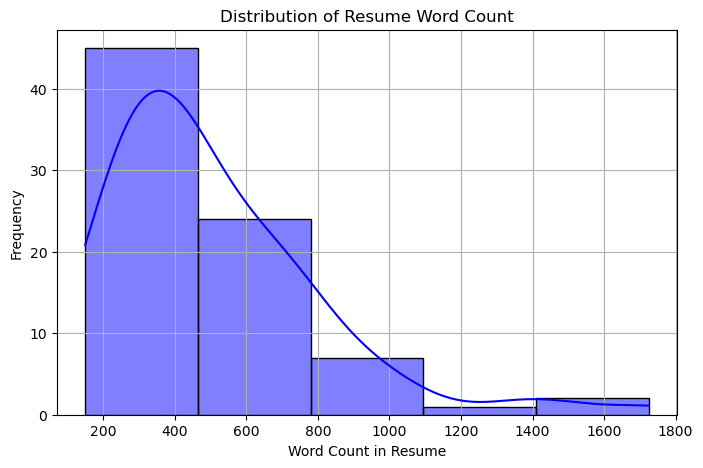

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct column names
df.columns = ["Resume_Details", "Categories"]

# --- TEXT LENGTH ANALYSIS ---
df["Resume_Length"] = df["Resume_Details"].astype(str).apply(lambda x: len(x.split()))

# Plot distribution of resume word count
plt.figure(figsize=(8, 5))
sns.histplot(df["Resume_Length"], bins=5, kde=True, color="blue")
plt.xlabel("Word Count in Resume")
plt.ylabel("Frequency")
plt.title("Distribution of Resume Word Count")
plt.grid(True)
plt.show()


## Top 20 Most Common Named Entities in Resumes

In [29]:
import spacy
from collections import Counter

# Load spaCy's pre-trained NLP model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Ensure 'Entities' column exists in the DataFrame
data['Entities'] = data['Resume_Details'].astype(str).apply(extract_entities)

# Flatten the list of entities from all resumes
all_entities = [ent for entity_list in data['Entities'] for ent in entity_list]

# Count occurrences of each entity
entity_counts = Counter(all_entities)

# Get the top 20 most common entities
top_20_entities = entity_counts.most_common(20)

# Print results
print("Top 20 Entities:")
for entity, count in top_20_entities:
    print(f"{entity[0]} ({entity[1]}): {count}")


Top 20 Entities:
workday (DATE): 50
daily (DATE): 31
xslt (DATE): 30
day day (DATE): 29
third (ORDINAL): 25
weekly (DATE): 20
one (CARDINAL): 19
indian (NORP): 19
india (GPE): 16
june (DATE): 16
july (DATE): 16
year (DATE): 16
english (LANGUAGE): 13
english (NORP): 12
monthly (DATE): 11
august (DATE): 10
node (GPE): 9
microsoft (ORG): 9
ibm (ORG): 7
node (ORG): 7


C:\Users\kavya\AppData\Local\Temp\ipykernel_2492\1536550259.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Entities'] = data['Resume_Details'].astype(str).apply(extract_entities)


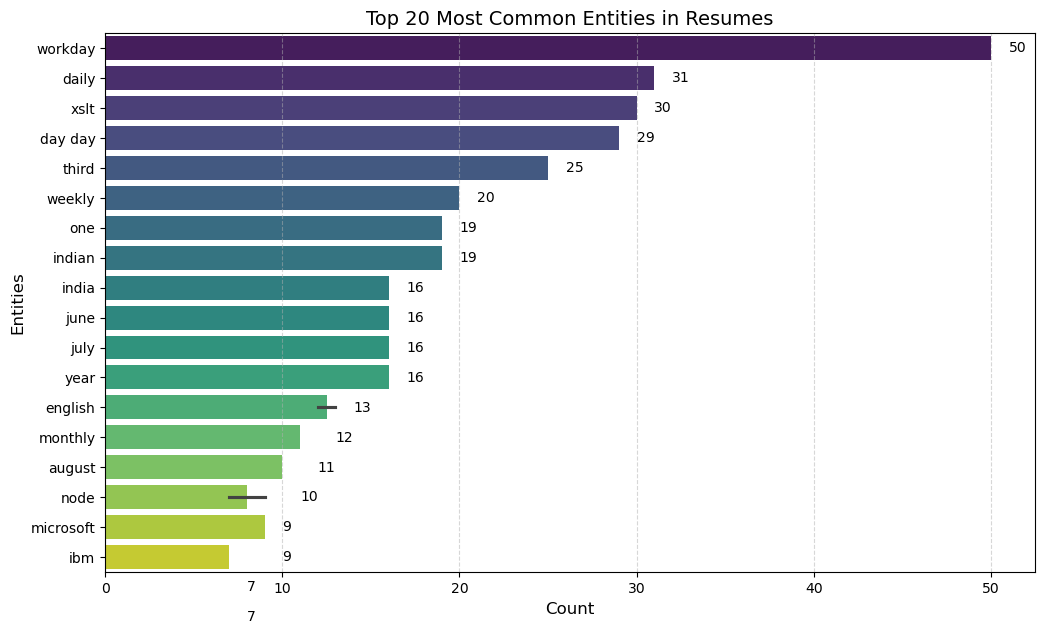

In [30]:
# Extract entity names and their counts
entity_names = [entity[0] for entity, count in top_20_entities]
entity_counts = [count for entity, count in top_20_entities]

# Set figure size
plt.figure(figsize=(12, 7))

# Create a bar plot with hue assigned to y
sns.barplot(x=entity_counts, y=entity_names, hue=entity_names, legend=False, palette="viridis")

# Add count labels on bars
for index, value in enumerate(entity_counts):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, color='black')

# Labels and title
plt.xlabel("Count", fontsize=12)
plt.ylabel("Entities", fontsize=12)
plt.title("Top 20 Most Common Entities in Resumes", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show plot
plt.show()


## Analyzing POS Tags in Resume Texts

In [31]:
# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# Dictionary to store POS tagging results
resume_pos_tags = {}

# Process each resume
for index, text in enumerate(data['Resume_Details'].astype(str).fillna("")):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    resume_pos_tags[index] = pos_tags

# Convert to DataFrame
pos_df = pd.DataFrame([(idx, word, pos) for idx, words in resume_pos_tags.items() for word, pos in words],
                      columns=["Resume_Index", "Word", "POS_Tag"])

In [23]:
print(pos_df)

       Resume_Index         Word POS_Tag
0                 0      anubhav   PROPN
1                 0        kumar   PROPN
2                 0        singh   PROPN
3                 0         core   PROPN
4                 0   competency    NOUN
...             ...          ...     ...
40244            78  information    NOUN
40245            78    furnished    VERB
40246            78         true     ADJ
40247            78         best     ADJ
40248            78    knowledge    NOUN

[40249 rows x 3 columns]


## Word Cloud Visualization of Resume Content

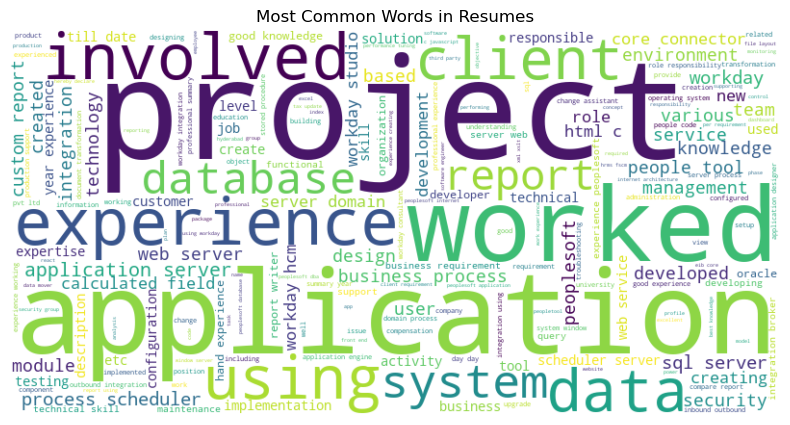

In [32]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data['Resume_Details']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Resumes")
plt.show()

## Top 20 Most Frequent Words in Resume Data

In [33]:
# Word Frequency Analysis
all_words = " ".join(data['Resume_Details']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

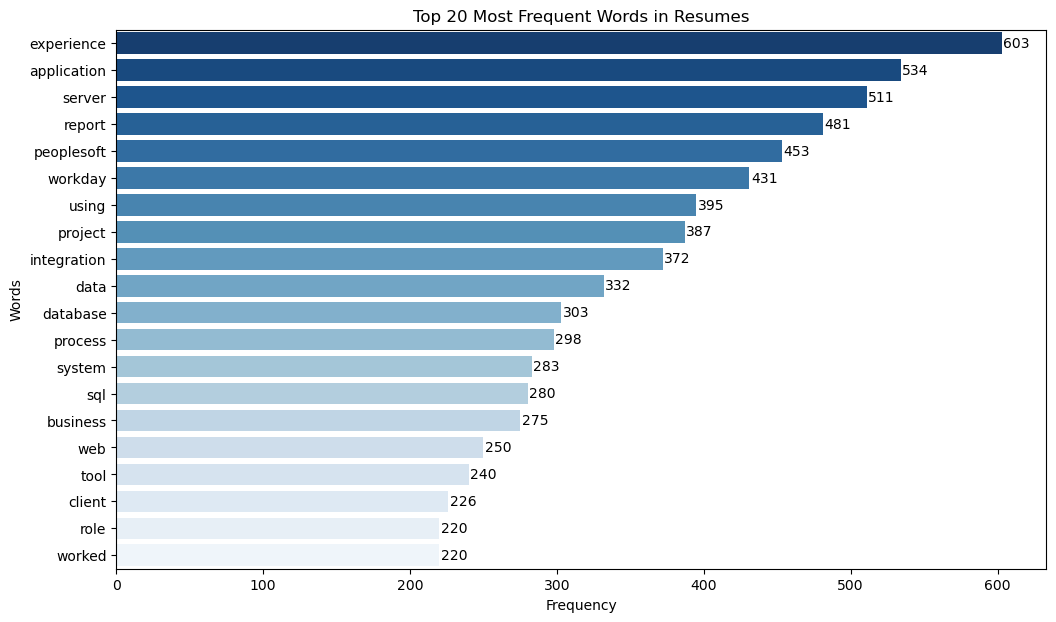

In [34]:
# Plot most common words with gradually decreasing color from top to bottom
plt.figure(figsize=(12, 7))
colors = sns.color_palette("Blues", len(most_common_words))[::-1]  # Reverse order for top to bottom gradient
ax = sns.barplot(x=list(counts), y=list(words), palette=colors, hue=list(words), legend=False)
plt.title("Top 20 Most Frequent Words in Resumes")
plt.xlabel("Frequency")
plt.ylabel("Words")
# Add word count labels on the right side of the bars
for index, value in enumerate(counts):
    ax.text(value + 1, index, str(value), color='black', va="center")

plt.show()

## Top 20 Most Frequent Bigrams in Resume Data

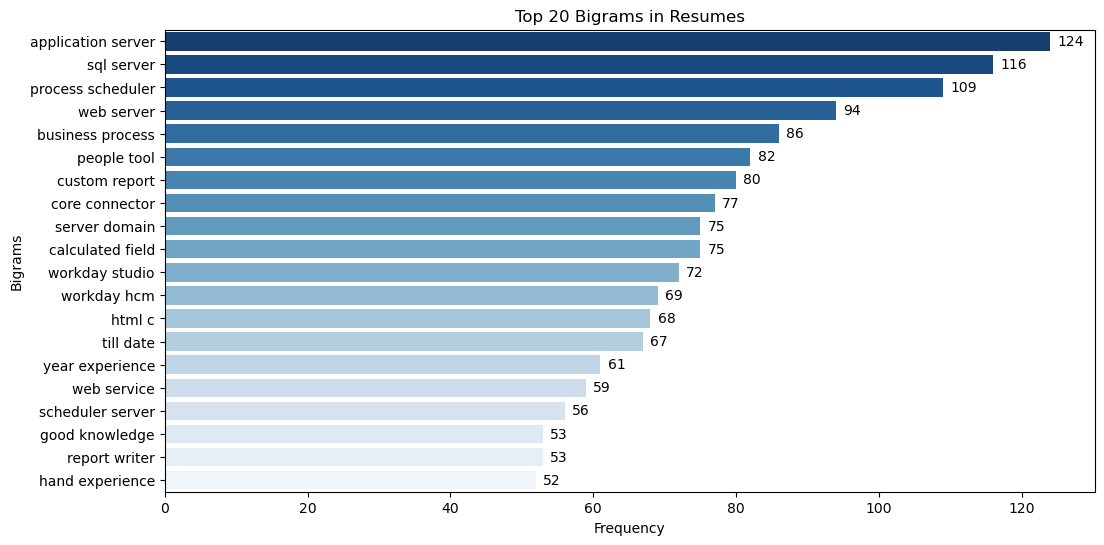

In [35]:
# Tokenize words
all_words = " ".join(data['Resume_Details']).split()

# Generate bigrams
bigrams_list = list(ngrams(all_words, 2))  # Create bigrams
bigram_counts = Counter(bigrams_list)  # Count occurrences

# Get the 20 most common bigrams
most_common_bigrams = bigram_counts.most_common(20)
bigrams, bigram_freq = zip(*most_common_bigrams)

# Convert bigrams to string format for plotting
bigrams = [" ".join(bigram) for bigram in bigrams]

# Plot bigram frequency with gradient colors
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Blues", len(most_common_bigrams))[::-1]  # Reverse gradient for clarity
ax = sns.barplot(x=list(bigram_freq), y=list(bigrams), palette=colors, hue=list(bigrams), legend=False)  # Fix applied

plt.title("Top 20 Bigrams in Resumes")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")

# Add bigram count labels on the right side of the bars
for index, value in enumerate(bigram_freq):
    ax.text(value + 1, index, str(value), color='black', va="center")

plt.show()


## Top 20 Most Frequent Trigrams in Resume Data

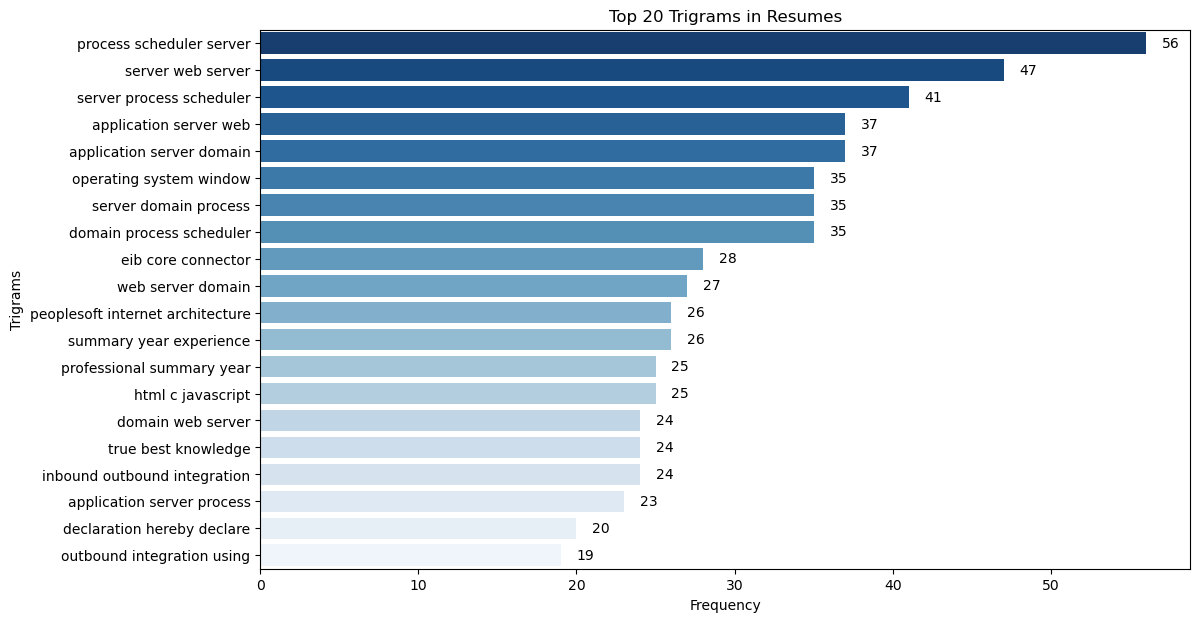

In [36]:
# Tokenize words
all_words = " ".join(data['Resume_Details']).split()

# Generate trigrams
trigrams_list = list(ngrams(all_words, 3))  # Correct trigrams 
trigram_counts = Counter(trigrams_list)  # Count occurrences

# Get the 20 most common trigrams
most_common_trigrams = trigram_counts.most_common(20)
trigrams, trigram_freq = zip(*most_common_trigrams)

# Convert trigrams to string format for plotting
trigrams = [" ".join(trigram) for trigram in trigrams]

# Plot trigram frequency with gradient colors
plt.figure(figsize=(12, 7))
colors = sns.color_palette("Blues", len(most_common_trigrams))[::-1]  # Reverse gradient for clarity
ax = sns.barplot(x=list(trigram_freq), y=list(trigrams), palette=colors, hue=list(trigrams), legend=False)  # Fix applied

plt.title("Top 20 Trigrams in Resumes")  # Updated Title 
plt.xlabel("Frequency")
plt.ylabel("Trigrams")  # Updated Label 

# Add trigram count labels on the right side of the bars
for index, value in enumerate(trigram_freq):
    ax.text(value + 1, index, str(value), color='black', va="center")

plt.show()
